<a href="https://colab.research.google.com/github/haldanejunior/TabelaFatoEDimensao/blob/main/projeto1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Tabelas Dimensão e Fato**

**Tabelas Dimensão**: Contém atributos descritivos, como detalhes sobre clientes, vendedores e produtos.

Ex.: armazenariam informações sobre produtos, clientes e lojas.

**Tabela Fato**: Contém os eventos mensuráveis, referenciando as dimensões por meio de chaves estrangeiras.

Ex.: armazenaria os valores de vendas (fatos) para cada transação.

## **Estrutura do nosso modelo**
###📌 **Dimensões**:

*   dim_clientes (Cliente_ID, Nome, Segmento, Localização, Tempo_Relacionamento_anos)
*   dim_vendedores (Vendedor_ID, Nome, Meta_Mensal, Comissao)
*   dim_tempo (Data_ID, Data, Ano, Mês, Trimestre)

###📌 **Fato**:
*   fato_vendas (Venda_ID, Data_ID, Cliente_ID, Vendedor_ID, Categoria_Produto, Região, Valor, Quantidade)

# **2. Criando as Tabelas com Python(Pandas)**


In [ ]:
import pandas as pd
import sqlite3

In [ ]:
#carregar os dados
df_clientes = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/base/clientes.csv')
df_vendas = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/base/vendas.csv')
df_vendedores = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/base/vendedores.csv')

# Visualização
df_clientes.shape
df_clientes.head()

,Cliente_ID,Nome,Segmento,Localização,Tempo_Relacionamento_anos
0,1,Jeffrey Roberts DDS,Grande Empresa,Michaelmouth,4
1,2,Shelley Page,Pequena Empresa,Port Teresa,8
2,3,Michael Vaughn,Pequena Empresa,Justinville,5
3,4,Paul Henderson,Grande Empresa,North Williamberg,10
4,5,Madeline Anderson,Grande Empresa,Montoyaland,7


In [ ]:
df_vendas.head(5)

,Venda_ID,Data,Valor,Quantidade,Vendedor_ID,Cliente_ID,Categoria_Produto,Região
0,1,2024-06-03,9732.67,29,3,20,Alimentos,Leste
1,2,2024-11-01,11401.93,26,3,19,Alimentos,Oeste
2,3,2024-10-08,47055.90,40,7,82,Eletrônicos,Leste
3,4,2024-11-02,17382.78,25,2,23,Móveis,Leste
4,5,2024-12-29,11813.23,16,10,60,Eletrônicos,Sul


In [ ]:
df_vendedores.head()

,Vendedor_ID,Nome,Meta_Mensal,Comissao
0,1,Kristopher Hernandez,140084,0.05
1,2,Tony Case,105680,0.04
2,3,Heather Newman,100859,0.06
3,4,Patrick Tran,120467,0.03
4,5,Michael Herrera,159751,0.04


In [ ]:
# Converte a coluna Data para o formato datetime (caso não esteja).
df_vendas["Ano"] = pd.to_datetime(df_vendas["Data"]).dt.year
df_vendas["Mes"] = pd.to_datetime(df_vendas["Data"]).dt.month
df_vendas["Trimestre"] = pd.to_datetime(df_vendas["Data"]).dt.quarter

In [ ]:
# Agrupando os dados do DataFrame df_vendas por ano e contando o número de ocorrências (linhas) para cada ano
grupo_ano = df_vendas.groupby("Ano").size()
#grupo_ano

# Soma das vendas por ano
vendas_por_ano = df_vendas.groupby("Ano")["Valor"].sum()
#vendas_por_ano

# Soma das vendas por ano e região
vendas_por_ano = df_vendas.groupby(["Ano","Região"])["Valor"].sum().reset_index()
vendas_por_ano

,Ano,Região,Valor
0,2024,Centro-Oeste,2091531.07
1,2024,Leste,2503901.20
2,2024,Norte,2216113.04
3,2024,Oeste,2339274.69
4,2024,Sul,2629763.39
5,2025,Centro-Oeste,203754.63
6,2025,Leste,41525.83
7,2025,Norte,163540.77
8,2025,Oeste,574171.95
9,2025,Sul,13956.99


In [ ]:
# Criando tabela dimensão tempo

df_tempo = df_vendas[["Data"]].drop_duplicates().reset_index(drop=True)
# O uso de colchetes duplos [["Data"]] retorna um DataFrame (em vez de uma Série).
df_tempo["Data_ID"] = df_tempo.index + 1 # Cria uma nova coluna chamada "Data_ID" que contém identificador único que começa no número 1
df_tempo = df_tempo[["Data_ID", "Data"]] #Reorganiza as colunas do DataFrame, colocando "Data_ID" como a primeira coluna e "Data" como a segunda.
df_tempo.head()

,Data_ID,Data
0,1,2024-06-03
1,2,2024-11-01
2,3,2024-10-08
3,4,2024-11-02
4,5,2024-12-29


In [ ]:
# Criando tabela Fato, combinando os dados das duas tabelas com base em uma coluna comum("Data")
df_vendas = df_vendas.merge(df_tempo, on="Data", how="left")
df_fato_vendas = df_vendas[
    ["Venda_ID", "Data_ID", "Cliente_ID", "Vendedor_ID", "Categoria_Produto", "Região", "Valor", "Quantidade"]
]

In [ ]:
# Tabela Dimensão
df_tempo.head(5)

,Data_ID,Data
0,1,2024-06-03
1,2,2024-11-01
2,3,2024-10-08
3,4,2024-11-02
4,5,2024-12-29


In [ ]:
# Tabela Fato
df_fato_vendas.head(11)
#df_fato_vendas.shape

,Venda_ID,Data_ID,Cliente_ID,Vendedor_ID,Categoria_Produto,Região,Valor,Quantidade
0,1,1,20,3,Alimentos,Leste,9732.67,29
1,2,2,19,3,Alimentos,Oeste,11401.93,26
2,3,3,82,7,Eletrônicos,Leste,47055.90,40
3,4,4,23,2,Móveis,Leste,17382.78,25
4,5,5,60,10,Eletrônicos,Sul,11813.23,16
5,6,6,37,5,Roupas,Norte,49814.56,12
6,7,7,20,3,Eletrônicos,Oeste,14304.13,19
7,8,8,38,4,Alimentos,Leste,4664.93,8
8,9,9,25,3,Automotivo,Sul,18928.00,25
9,10,10,54,2,Roupas,Centro-Oeste,8460.00,18


In [ ]:
# Verificando valores nulos
print(df_fato_vendas.isnull().sum())

# Caso tivesse -> substituindo valores nulos
# df_fato_vendas.fillna(0, inplace=True)  # Substituir valores nulos por 0

Venda_ID             0
Data_ID              0
Cliente_ID           0
Vendedor_ID          0
Categoria_Produto    0
Região               0
Valor                0
Quantidade           0
dtype: int64


DISTRIBUIÇÃO DOS VALORES

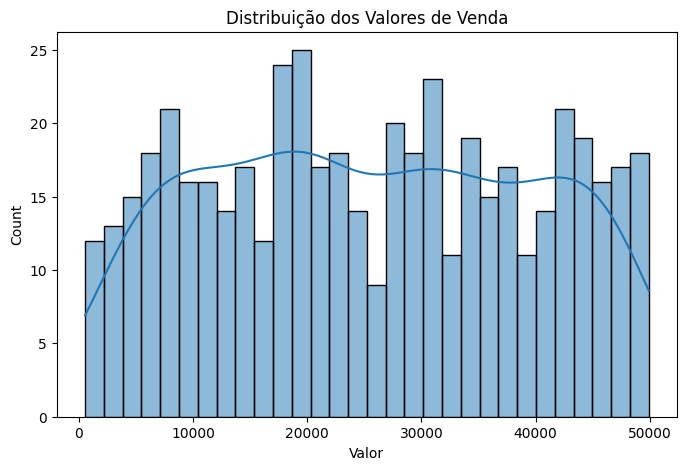

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Distribuição dos valores das vendas
plt.figure(figsize=(8, 5))
sns.histplot(df_fato_vendas["Valor"], bins=30, kde=True)
plt.title("Distribuição dos Valores de Venda")
plt.show()

  CORRELAÇÃO ENTRE VARIÁVEIS

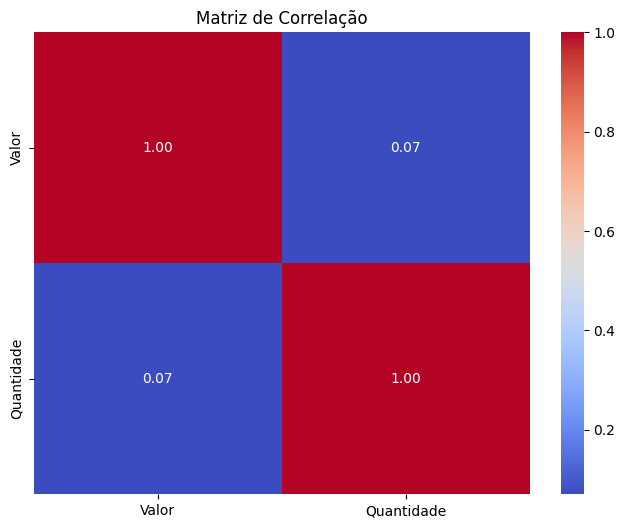

In [ ]:
#df_numerico = df_fato_vendas.select_dtypes(include=[np.number])
#df_numericocomo = df_fato_vendas("Valor")

# Calcula a matriz correlação
correl_matrix = df_fato_vendas[["Valor", "Quantidade"]].corr()

# Plota o mapa de calor da matriz correlação
plt.figure(figsize=(8, 6))
sns.heatmap(correl_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

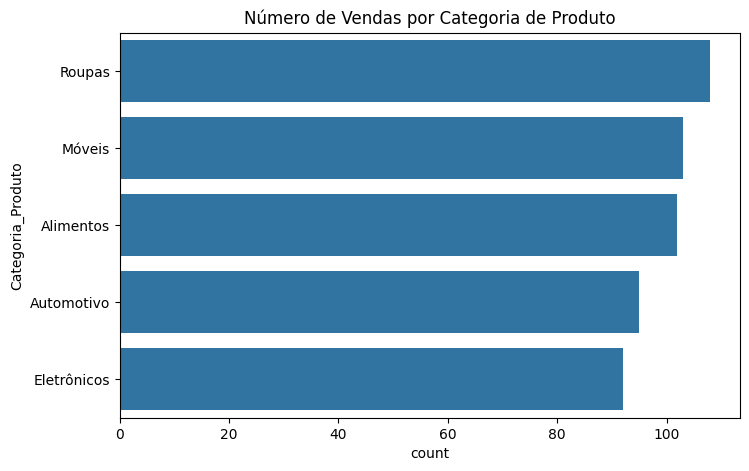

In [ ]:
# ANALISANDO CATEGORIAS COM GRÁFICO DE BARRAS
plt.figure(figsize=(8, 5))
sns.countplot(y=df_vendas["Categoria_Produto"], order=df_vendas["Categoria_Produto"].value_counts().index)
plt.title("Número de Vendas por Categoria de Produto")
plt.show()

'Data' já é índice do DataFrame.


<ipython-input-61-8434ed3e3999>:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  vendas_mensais = df_vendas["Valor"].resample("M").sum()


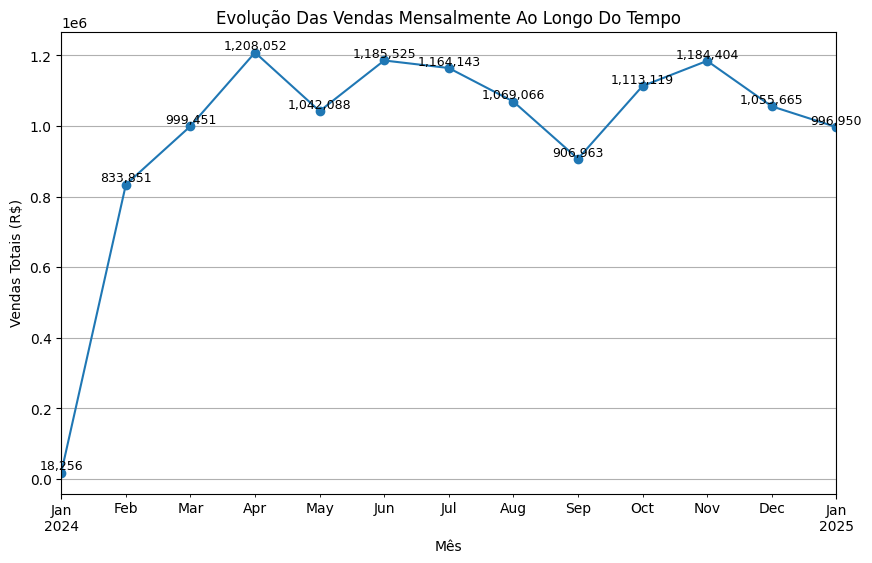

In [ ]:
# ANALISANDO SÉRIE TEMPORAL

# Verifica se "Data" é o índice
if 'Data' in df_vendas.columns:
    df_vendas["Data"] = pd.to_datetime(df_vendas["Data"])
    df_vendas.set_index("Data", inplace=True)
else:
    # "Data" já é índice então não precisa configurar
    print("'Data' já é índice do DataFrame.")

# Resample para obter as vendas mensais
vendas_mensais = df_vendas["Valor"].resample("M").sum()

# Plotar o gráfico
ax = vendas_mensais.plot(figsize=(10, 6), marker="o", linestyle="-")
plt.title("Evolução Das Vendas Mensalmente Ao Longo Do Tempo")
plt.xlabel("Mês")
plt.ylabel("Vendas Totais (R$)")
plt.grid(True)

# Adicionar os valores de soma de vendas totais mensais em cada marcador
for x, y in zip(vendas_mensais.index, vendas_mensais.values):
    ax.text(x, y + 50, f"{y:,.0f}", ha="center", va="bottom", fontsize=9, color="black")

plt.show()

In [ ]:
# Soma das vendas por ano
vendas_por_mes = df_vendas.groupby(["Ano","Mes"])["Valor"].sum().reset_index()
vendas_por_mes

,Ano,Mes,Valor
0,2024,1,18256.42
1,2024,2,833851.45
2,2024,3,999450.81
3,2024,4,1208051.59
4,2024,5,1042088.41
5,2024,6,1185525.09
6,2024,7,1164143.11
7,2024,8,1069066.27
8,2024,9,906963.44
9,2024,10,1113118.56


In [ ]:
# Identificar Vendedores de Melhor Desempenho
top_vendedores = df_vendas.groupby("Vendedor_ID")["Valor"].sum().nlargest(3)
print(top_vendedores)

Vendedor_ID
1     1538248.96
3     1443455.05
10    1406050.68
Name: Valor, dtype: float64


In [ ]:
# Criando um Relatório Final
relatorio = {
    "Total de Vendas": df_vendas["Valor"].sum(),
    "Número de Vendas": len(df_vendas),
    "Média de Venda": df_vendas["Valor"].mean(),
    "Maior Venda": df_vendas["Valor"].max(),
    "Menor Venda": df_vendas["Valor"].min(),
}

print(pd.DataFrame(relatorio, index=["Valores"]))

         Total de Vendas  Número de Vendas  Média de Venda  Maior Venda  \
Valores      12777533.56               500     25555.06712     49897.74   

         Menor Venda  
Valores       560.98  
